In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import json

In [29]:
data = pd.read_csv('./data/audi.csv')

In [30]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [31]:
len(data)

10668

In [32]:
df = data[data.model != 'A1']

In [33]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [34]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [35]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [36]:
df = data[data.year != 2017]

In [37]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0


In [38]:
len(df)

8733

In [39]:
len(data)

10668

In [40]:
data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [41]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [42]:
def object_to_int(pd_df_data,coloum:list):
    info_indexs = {}
    index = -1
    for info_in_coloum in pd_df_data[coloum]:
        if info_in_coloum not in info_indexs.keys():
            index = index + 1
            info_indexs[info_in_coloum] = index
    print(info_indexs)
    print('*'*100)
    final_list = []
    for all_info_object in pd_df_data[coloum]:
        final_list.append(info_indexs[all_info_object])
    print(info_indexs)
    return final_list,info_indexs

In [43]:
with open('model_info_dict.json','w') as json_file:
    info = object_to_int(data,'model')[1]
    print(info)
    json.dump(info,json_file)
data['model'] = object_to_int(data,'model')[0]

{' A1': 0, ' A6': 1, ' A4': 2, ' A3': 3, ' Q3': 4, ' Q5': 5, ' A5': 6, ' S4': 7, ' Q2': 8, ' A7': 9, ' TT': 10, ' Q7': 11, ' RS6': 12, ' RS3': 13, ' A8': 14, ' Q8': 15, ' RS4': 16, ' RS5': 17, ' R8': 18, ' SQ5': 19, ' S8': 20, ' SQ7': 21, ' S3': 22, ' S5': 23, ' A2': 24, ' RS7': 25}
****************************************************************************************************
{' A1': 0, ' A6': 1, ' A4': 2, ' A3': 3, ' Q3': 4, ' Q5': 5, ' A5': 6, ' S4': 7, ' Q2': 8, ' A7': 9, ' TT': 10, ' Q7': 11, ' RS6': 12, ' RS3': 13, ' A8': 14, ' Q8': 15, ' RS4': 16, ' RS5': 17, ' R8': 18, ' SQ5': 19, ' S8': 20, ' SQ7': 21, ' S3': 22, ' S5': 23, ' A2': 24, ' RS7': 25}
{' A1': 0, ' A6': 1, ' A4': 2, ' A3': 3, ' Q3': 4, ' Q5': 5, ' A5': 6, ' S4': 7, ' Q2': 8, ' A7': 9, ' TT': 10, ' Q7': 11, ' RS6': 12, ' RS3': 13, ' A8': 14, ' Q8': 15, ' RS4': 16, ' RS5': 17, ' R8': 18, ' SQ5': 19, ' S8': 20, ' SQ7': 21, ' S3': 22, ' S5': 23, ' A2': 24, ' RS7': 25}
{' A1': 0, ' A6': 1, ' A4': 2, ' A3': 3, ' Q3':

In [44]:
data.dtypes

model             int64
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [45]:
with open('transmission_info_dict.json','w') as json_file:
    info = object_to_int(data,'transmission')[1]
    print(info)
    json.dump(info,json_file)
data['transmission'] = object_to_int(data,'transmission')[0]

{'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2}
****************************************************************************************************
{'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2}
{'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2}
{'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2}
****************************************************************************************************
{'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2}


In [46]:
with open('fuelType_info_dict.json','w') as json_file:
    info = object_to_int(data,'fuelType')[1]
    print(info)
    json.dump(info,json_file)
data['fuelType'] = object_to_int(data,'fuelType')[0]

{'Petrol': 0, 'Diesel': 1, 'Hybrid': 2}
****************************************************************************************************
{'Petrol': 0, 'Diesel': 1, 'Hybrid': 2}
{'Petrol': 0, 'Diesel': 1, 'Hybrid': 2}
{'Petrol': 0, 'Diesel': 1, 'Hybrid': 2}
****************************************************************************************************
{'Petrol': 0, 'Diesel': 1, 'Hybrid': 2}


In [47]:
data.dtypes

model             int64
year              int64
price             int64
transmission      int64
mileage           int64
fuelType          int64
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [48]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,0,15735,0,150,55.4,1.4
1,1,2016,16500,1,36203,1,20,64.2,2.0
2,0,2016,11000,0,29946,0,30,55.4,1.4
3,2,2017,16800,1,25952,1,145,67.3,2.0
4,3,2019,17300,0,1998,0,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,3,2020,16999,0,4018,0,145,49.6,1.0
10664,3,2020,16999,0,1978,0,150,49.6,1.0
10665,3,2020,17199,0,609,0,150,49.6,1.0
10666,4,2017,19499,1,8646,0,150,47.9,1.4


In [49]:
X = data.drop(['price','tax'],axis=1)
y = data.drop(['model','year','transmission','mileage','fuelType','mpg','engineSize'],axis=1)

In [50]:
from sklearn.svm import SVC,SVR
from sklearn.linear_model import Lasso,LassoLars
from sklearn.ensemble import RandomForestRegressor

In [51]:
model_SVC = SVC()
model_SVR = SVR()
model_Lasso = Lasso()
model_LassoLars = LassoLars()
model_RandomForestRegressor = RandomForestRegressor()

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [53]:
model_RandomForestRegressor.fit(X_train,y_train)
print(model_RandomForestRegressor.score(X_test,y_test))

0.9004998488785727


In [54]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model_RandomForestRegressor,X,y,cv=25)
results

array([0.89579019, 0.88229133, 0.90899893, 0.91394616, 0.91228303,
       0.89912942, 0.9063302 , 0.89054172, 0.89543628, 0.92255473,
       0.88935105, 0.91395759, 0.9048165 , 0.88276597, 0.82460994,
       0.85237153, 0.88468676, 0.86302956, 0.92607002, 0.91686323,
       0.91060337, 0.85861723, 0.91560182, 0.92396582, 0.89674486])

In [55]:
y_preds = model_RandomForestRegressor.predict(X_test)

In [56]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Regression
print('Classifier Metricks on the test data set')
print(f'MSE : {mean_squared_error(y_test,y_preds)*100}')
print(f'MAE : {mean_absolute_error(y_test,y_preds)}')
print(f'R2 Score : {r2_score(y_test,y_preds)}')

Classifier Metricks on the test data set
MSE : 243109303.80197024
MAE : 758.7768465501659
R2 Score : 0.9004998488785727


In [57]:
from sklearn.model_selection import GridSearchCV
grid = {
    "n_estimators":[250,500],
    "max_depth":[None,5,10],
    "max_features":["auto","sqrt"],
    "min_samples_split":[3,5],
    "min_samples_leaf":[3,5]
}
np.random.seed(42)
model_RandomForestRegressor = RandomForestRegressor()
# Randomized Sarch CV
gs_regressor = GridSearchCV(estimator=model_RandomForestRegressor,
                            param_grid=grid,
                            cv=5,
                            verbose=5)
gs_regressor.fit(X_train,y_train)
gs_regressor.best_estimator_
gs_regressor.score(X_test,y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.891, total=   2.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.902, total=   2.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.908, total=   2.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.7s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.905, total=   3.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.7s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.904, total=   3.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.890, total=   6.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.901, total=   5.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.909, total=   5.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=5

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.905, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.916, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.907, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.903, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=5

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.896, total=   2.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.892, total=   2.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.708, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.742, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.739, t

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.735, total=   3.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.730, total=   3.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.726, total=   3.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.726, total=   2.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.773, total=   0

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.778, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.771, total=   1.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.793, total=   1.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.794, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.790, total=   1

[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.872, total=   3.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.869, total=   2.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.872, total=   2.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.877, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=0.859, t

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=500, score=0.883, total=   2.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=500, score=0.877, total=   2.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.873, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.881, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.886, t

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 10.3min finished


0.907051425616213

In [58]:
# gs_regressor.fit(X_train,y_train)
y_preds = gs_regressor.predict(X_test)
print(f'MSE : {mean_squared_error(y_test,y_preds)*100}')
print(f'MAE : {mean_absolute_error(y_test,y_preds)}')
print(f'R2 Score : {r2_score(y_test,y_preds)}')

MSE : 274115112.27696
MAE : 787.8134660193166
R2 Score : 0.907051425616213


In [59]:
normal = {"MSE":510.520773745,"MAE":148.446522692,"R2 Score":96.510412023}

In [60]:
random = {"MSE":533.326345614,"MAE":150.825619579,"R2 Score":96.354527965}

In [61]:
grid = {"MSE":539.6257001053331,"MAE":151.333927621,"R2 Score":96.311469675}

In [62]:
df = pd.DataFrame({'Normal':normal,'Random':random,'Grid':grid})

<AxesSubplot:>

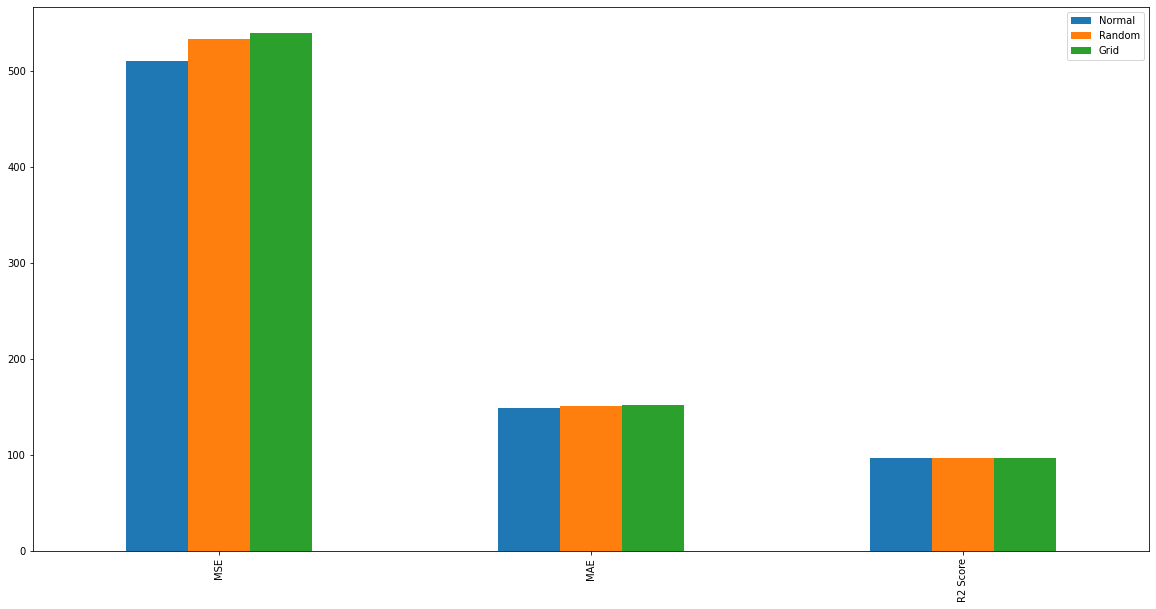

In [63]:
df.plot.bar(figsize=(20,10))

In [64]:
pickle.dump(gs_regressor,open('model_random_forrest_regressor.pkl','wb'))

In [65]:
!ls

app.py		 fuelType_info_dict.json  model_random_forrest_regressor.pkl
comparision.png  main.ipynb		  transmission_info_dict.json
data		 model_info_dict.json


In [66]:
model = pickle.load(open('model_random_forrest_regressor.pkl','rb'))

In [67]:
model.score(X_test,y_test)

0.907051425616213

In [68]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [69]:
X

,model,year,transmission,mileage,fuelType,mpg,engineSize
0,0,2017,0,15735,0,55.4,1.4
1,1,2016,1,36203,1,64.2,2.0
2,0,2016,0,29946,0,55.4,1.4
3,2,2017,1,25952,1,67.3,2.0
4,3,2019,0,1998,0,49.6,1.0
...,...,...,...,...,...,...,...
10663,3,2020,0,4018,0,49.6,1.0
10664,3,2020,0,1978,0,49.6,1.0
10665,3,2020,0,609,0,49.6,1.0
10666,4,2017,1,8646,0,47.9,1.4


In [70]:
y

,price,tax
0,12500,150
1,16500,20
2,11000,30
3,16800,145
4,17300,145
...,...,...
10663,16999,145
10664,16999,150
10665,17199,150
10666,19499,150
